### Treść zadania

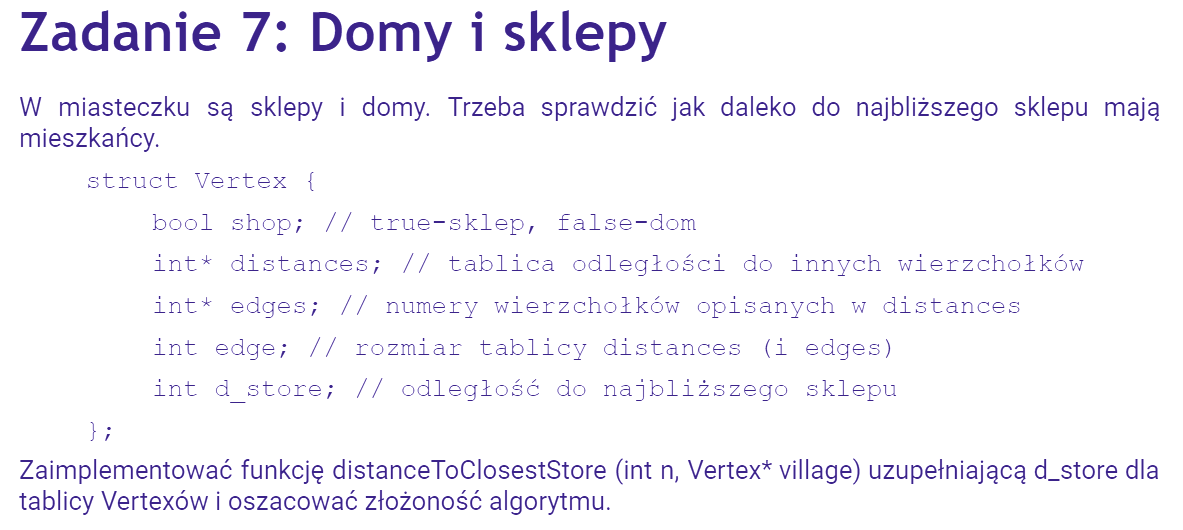

### Omówienie algorytmu

Tym razem jednak krawędzie posiadają wagi, więc konieczne jest zastosowanie algorytmu Dijkstry. W skrócie, to dodajemy na początek do kolejki priorytetowej wszystkie sklepy z wagami 0, a następnie odpalamy z każdego algorytm Dijsktry. W ten sposób wiemy zawsze, że jeżeli przetworzymy jakiś wierzchołek, to prowadząca do niego ścieżka jest najkrótsza.

### Złożoność

###### Obliczeniowa:
$ O(E \cdot log(V)) $  - jak dla algorytmu Dijkstry dla listowej reprezentacji grafu
###### Pamięciowa:
$ O(E) $  - maksymalnie tyle elementów znajdzie się w kolejce priorytetowej (potrzebnego miejsca na stworzenie grafu nie wliczam do złożoności, ponieważ uznaję, że jest on dany)

### Implementacja

In [1]:
from queue import PriorityQueue


class Vertex:
    def __init__(self):
        self.shop = False
        self.distances = []
        self.edges = []
        self.edge = 0
        self.d_store = float('inf')
        
    def __str__(self):
        return f"Vertex ({' shop' if self.shop else 'house'}):  Closest shop distance: {self.d_store:<3}  Neighbours: {list(zip(self.edges, self.distances))}"
        
        
def distanceToClosestStore(village: [Vertex]):
    n = len(village)
    inf = float('inf')
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    pq = PriorityQueue()
    # Add all shops to the queue (we will start Dijkstra's algorithm from
    # all the shops to find shortest paths to all the houses)
    for i in range(n):
        if village[i].shop:
            pq.put((0, i))
    
    while not pq.empty() and to_relax:
        min_w, u = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < village[u].d_store:
            village[u].d_store = min_w
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for i in range(G[u].edge):
                v = G[u].edges[i]
                if village[v].d_store == inf: 
                    pq.put((G[u].d_store + G[u].distances[i], v))

###### Kilka testów

##### Pomocnicze:

In [2]:
def create_village(E: 'array of edges', S: 'array of shops indices'):
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
        
    G = [Vertex() for _ in range(n)]
    
    for s in S: G[s].shop = True
    
    for e in E:
        G[e[0]].edges.append(e[1])
        G[e[0]].distances.append(e[2])
        G[e[0]].edge += 1
        G[e[1]].edges.append(e[0])
        G[e[1]].distances.append(e[2])
        G[e[1]].edge += 1
        
    return G

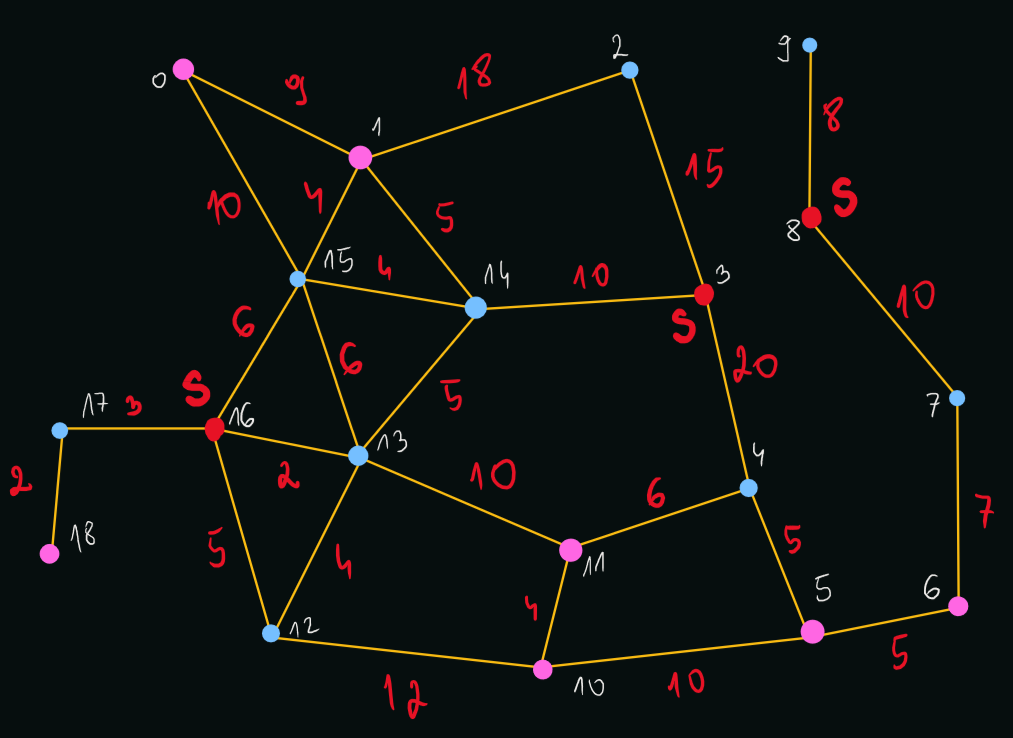

In [3]:
E = [(0, 1, 9), (1, 2, 18), (2, 3, 15), (3, 4, 20), (4, 5, 5), (5, 6, 5), (6, 7, 7), (7, 8, 10), (8, 9, 8), 
     (0, 15, 10), (1, 15, 4), (1, 14, 5), (15, 14, 4), (14, 3, 10), (15, 13, 6), (13, 14, 5), (16, 15, 6), 
     (16, 13, 2), (18, 17, 2), (17, 16, 3), (16, 12, 5), (12, 13, 4), (13, 11, 10), (11, 10, 4), 
     (12, 10, 12), (10, 5, 10), (11, 4, 6)]
shops = [16, 3, 8]

G = create_village(E, shops)
print(*(f'{i:<2}: {content}' for i, content in enumerate(G)), sep='\n', end='\n\n')

distanceToClosestStore(G)

print('\nResult:')
print(*(f'{i:<2}: {content}' for i, content in enumerate(G)), sep='\n', end='\n\n')

0 : Vertex (house):  Closest shop distance: inf  Neighbours: [(1, 9), (15, 10)]
1 : Vertex (house):  Closest shop distance: inf  Neighbours: [(0, 9), (2, 18), (15, 4), (14, 5)]
2 : Vertex (house):  Closest shop distance: inf  Neighbours: [(1, 18), (3, 15)]
3 : Vertex ( shop):  Closest shop distance: inf  Neighbours: [(2, 15), (4, 20), (14, 10)]
4 : Vertex (house):  Closest shop distance: inf  Neighbours: [(3, 20), (5, 5), (11, 6)]
5 : Vertex (house):  Closest shop distance: inf  Neighbours: [(4, 5), (6, 5), (10, 10)]
6 : Vertex (house):  Closest shop distance: inf  Neighbours: [(5, 5), (7, 7)]
7 : Vertex (house):  Closest shop distance: inf  Neighbours: [(6, 7), (8, 10)]
8 : Vertex ( shop):  Closest shop distance: inf  Neighbours: [(7, 10), (9, 8)]
9 : Vertex (house):  Closest shop distance: inf  Neighbours: [(8, 8)]
10: Vertex (house):  Closest shop distance: inf  Neighbours: [(11, 4), (12, 12), (5, 10)]
11: Vertex (house):  Closest shop distance: inf  Neighbours: [(13, 10), (10, 4), 

#### (Dodatkowo) Znajdowanie najkrótszych ścieżek do najbliższego sklepu z każdego domu

In [4]:
from queue import PriorityQueue


class Vertex:
    def __init__(self):
        self.shop = False
        self.distances = []
        self.edges = []
        self.edge = 0
        self.d_store = float('inf')
        
    def __str__(self):
        return f"Vertex ({' shop' if self.shop else 'house'}):  Closest shop distance: {self.d_store:<3}  Neighbours: {list(zip(self.edges, self.distances))}"
        
        
def pathToClosestStore(village: [Vertex]):
    n = len(village)
    inf = float('inf')
    # This variable is a counter of vertices remaining which we still
    # have to find shortest paths to
    to_relax = n
    parents = [None] * n
    pq = PriorityQueue()
    # Add all shops to the queue (we will start Dijkstra's algorithm from
    # all the shops to find shortest paths to all the houses)
    for i in range(n):
        if village[i].shop:
            pq.put((0, i, None))
    
    while not pq.empty() and to_relax:
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < village[u].d_store:
            village[u].d_store = min_w
            parents[u] = parent
            to_relax -= 1
            # Add all the neighbours of the u vertex to the priority queue
            for i in range(G[u].edge):
                v = G[u].edges[i]
                if village[v].d_store == inf: 
                    pq.put((G[u].d_store + G[u].distances[i], v, u))
                
    return parents


def shorestPathToClosestStoreWrapper(village: [Vertex]): 
    parents = pathToClosestStore(village)
    
    def shorestPathToClosestStore(house: 'index of a house') -> list:
        path = []
        u = house
        
        while u is not None:
            path.append(u)
            u = parents[u]
            
        return path
        
    return shorestPathToClosestStore

###### Kilka testów

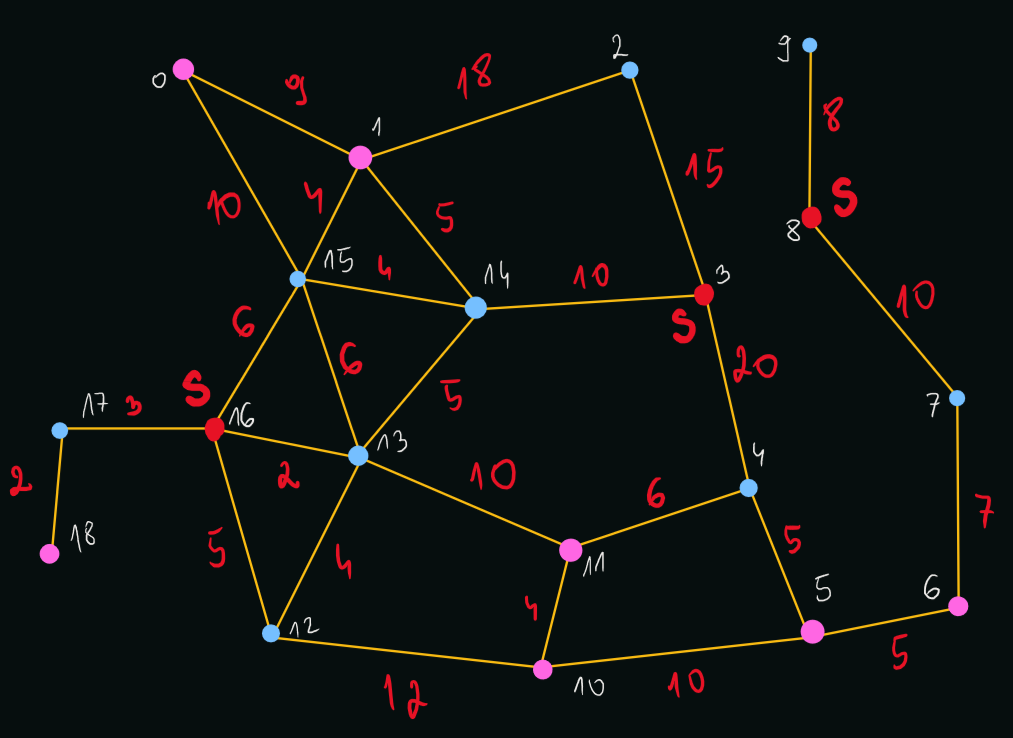

In [5]:
E = [(0, 1, 9), (1, 2, 18), (2, 3, 15), (3, 4, 20), (4, 5, 5), (5, 6, 5), (6, 7, 7), (7, 8, 10), (8, 9, 8), 
     (0, 15, 10), (1, 15, 4), (1, 14, 5), (15, 14, 4), (14, 3, 10), (15, 13, 6), (13, 14, 5), (16, 15, 6), 
     (16, 13, 2), (18, 17, 2), (17, 16, 3), (16, 12, 5), (12, 13, 4), (13, 11, 10), (11, 10, 4), 
     (12, 10, 12), (10, 5, 10), (11, 4, 6)]
shops = [16, 3, 8]

G = create_village(E, shops)
print(*(f'{i:<2}: {content}' for i, content in enumerate(G)), sep='\n', end='\n\n')

shorestPathToClosestStore = shorestPathToClosestStoreWrapper(G)

0 : Vertex (house):  Closest shop distance: inf  Neighbours: [(1, 9), (15, 10)]
1 : Vertex (house):  Closest shop distance: inf  Neighbours: [(0, 9), (2, 18), (15, 4), (14, 5)]
2 : Vertex (house):  Closest shop distance: inf  Neighbours: [(1, 18), (3, 15)]
3 : Vertex ( shop):  Closest shop distance: inf  Neighbours: [(2, 15), (4, 20), (14, 10)]
4 : Vertex (house):  Closest shop distance: inf  Neighbours: [(3, 20), (5, 5), (11, 6)]
5 : Vertex (house):  Closest shop distance: inf  Neighbours: [(4, 5), (6, 5), (10, 10)]
6 : Vertex (house):  Closest shop distance: inf  Neighbours: [(5, 5), (7, 7)]
7 : Vertex (house):  Closest shop distance: inf  Neighbours: [(6, 7), (8, 10)]
8 : Vertex ( shop):  Closest shop distance: inf  Neighbours: [(7, 10), (9, 8)]
9 : Vertex (house):  Closest shop distance: inf  Neighbours: [(8, 8)]
10: Vertex (house):  Closest shop distance: inf  Neighbours: [(11, 4), (12, 12), (5, 10)]
11: Vertex (house):  Closest shop distance: inf  Neighbours: [(13, 10), (10, 4), 

In [6]:
shorestPathToClosestStore(18)

[18, 17, 16]

In [7]:
shorestPathToClosestStore(9)

[9, 8]

In [8]:
shorestPathToClosestStore(0)

[0, 15, 16]

In [9]:
shorestPathToClosestStore(2)

[2, 3]

In [10]:
shorestPathToClosestStore(10)

[10, 11, 13, 16]